In [1]:
%matplotlib inline
from IPython.display import Markdown, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

In [2]:
# constants
density_of_air = 1.293
# area_of_prop_blade = 3.334e-3
# area_of_fin = (10 * 39 + 24 * 50) * 2 / 1e6

# # c + bx + ax^2 = 0
# coef_of_lift_equation = np.array([ 0, 0.03789803, -0.00061863])

In [3]:
def solve_quadratic(a, b, c, y):
    c_prime = c - y
    discriminant = b**2 - 4*a*c_prime

    if discriminant > 0:
        x1 = (-b + math.sqrt(discriminant)) / (2 * a)
        x2 = (-b - math.sqrt(discriminant)) / (2 * a)
        return (x1, x2)
    elif discriminant == 0:
        x = -b / (2 * a)
        return (x,)
    else:
        # No real roots
        return ()

class Craft:
    area_of_prop_blade = 3.334e-3
    propeller_pitch = 10.67 / 100
    
    # c + bx + ax^2 = 0
    coef_of_lift_equation = np.array([ 0, 0.03789803, -0.00061863])
    
    def __init__(self, area_of_fin):
        self.area_of_fin = area_of_fin
        pass
    
    def get_wind_speed_from_rps(self, rps):
        return rps * self.propeller_pitch * 0.9
    
    def get_coeff_of_lift(self, force, wind_speed):
        return 2 * force / (density_of_air * self.area_of_fin * (wind_speed**2))
    
    def get_fin_angle_from_coef_of_lift(self, cl):
        max_angle = 30
        roots = solve_quadratic(self.coef_of_lift_equation[2], self.coef_of_lift_equation[1], self.coef_of_lift_equation[0], cl)
        if len(roots) == 2:
            if roots[0] >= 0 and roots[0] <= max_angle and roots[1] >= 0 and roots[1] <= max_angle:
                angle = min(roots[0], min[roots[1]])
            elif roots[0] >= 0 and roots[0] <= max_angle:
                angle = roots[0]
            elif roots[1] >= 0 and roots[1] <= max_angle:
                angle = roots[1]
            else:
                # need to work
                angle = 0
        elif len(roots) == 1:
            if roots[0] < 0:
                angle = 0
            elif roots[0] > max_angle:
                angle = max_angle
        else:
            angle = max_angle
    
        return angle
    
    def get_fin_angle_from_force(self, force, rps):
        wind_speed = self.get_wind_speed_from_rps(rps)
        cl = self.get_coeff_of_lift(abs(force), wind_speed)
        fin_angle = self.get_fin_angle_from_coef_of_lift(cl)
        return fin_angle * (force / abs(force))

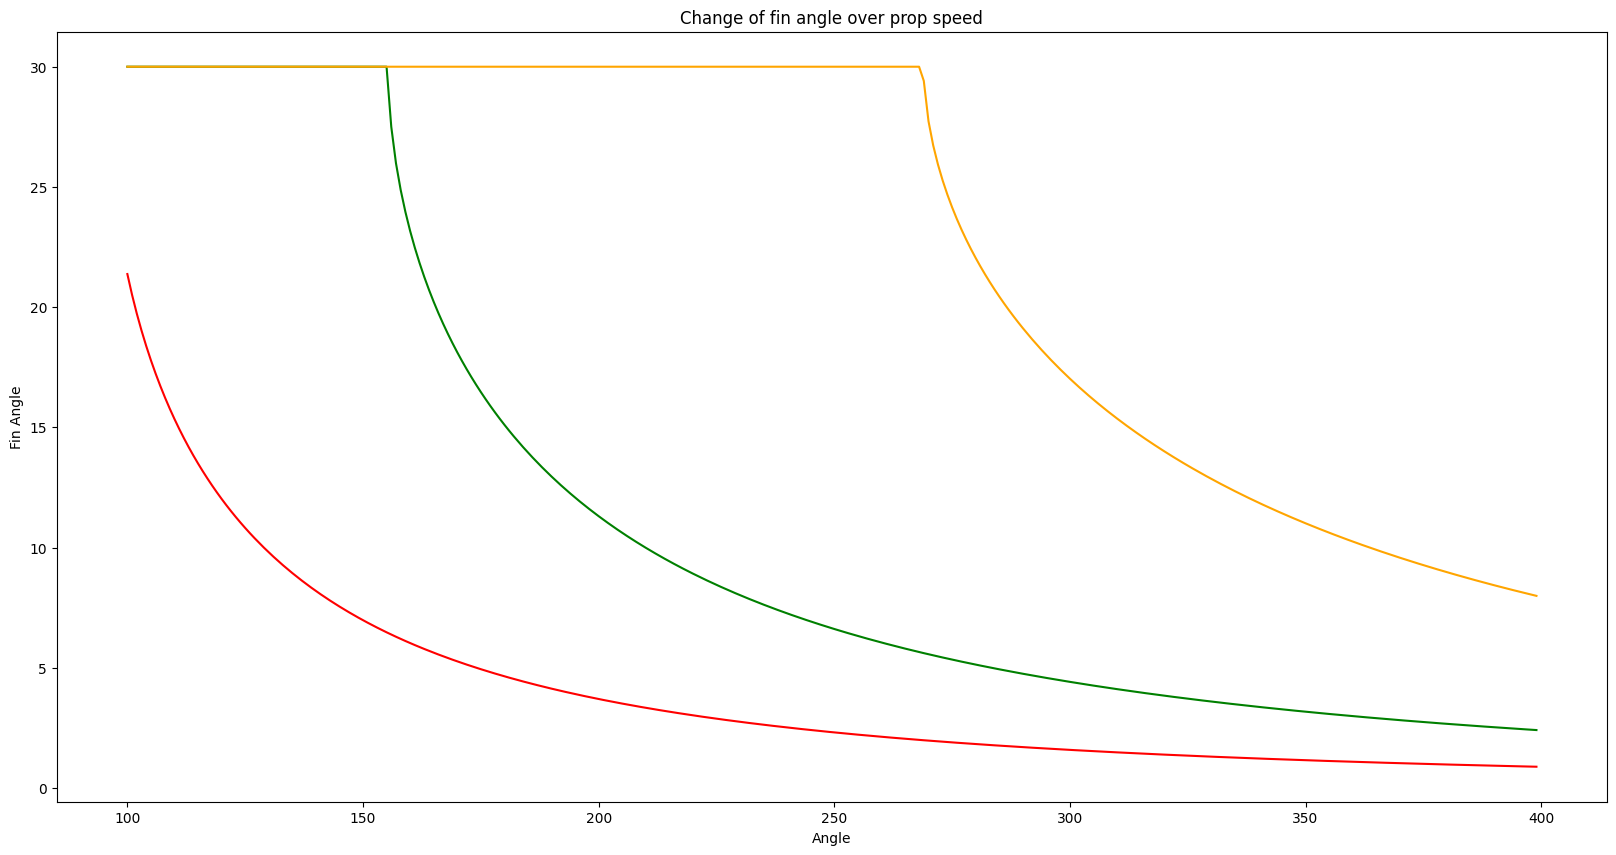

In [14]:
required_force = 0.1 # in N
propeller_speed_in_rps = np.arange(100, 400, 1)

fin_angles = [
    ((10 * 39 + 24 * 50) * 2 / 1e6, 'red'),
    ((24 * 50) / 1e6, 'green'),
    ((10 * 20)*2 / 1e6, 'orange')
]

plt.figure(figsize=(20, 10))

for fin_area, color in fin_angles:
    c = Craft(fin_area)
    fin_angles = np.array([c.get_fin_angle_from_force(required_force, x) for x in propeller_speed_in_rps])
    plt.plot(propeller_speed_in_rps, fin_angles, color=color)
    
# plt.plot(propeller_speed_in_rps,fin_angles.predict(X_poly), color='green')
plt.title('Change of fin angle over prop speed')
plt.xlabel('Angle')
plt.ylabel('Fin Angle')
plt.show()